<a href="https://colab.research.google.com/github/Sanku1234/abhishek/blob/main/ML_firstlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)


Saving Housing.csv to Housing (1).csv
{'Housing (1).csv': b'price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus\r\n13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished\r\n12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished\r\n12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished\r\n12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished\r\n11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished\r\n10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished\r\n10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished\r\n10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished\r\n9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished\r\n9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished\r\n9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished\r\n9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished\r\n9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished\r\n9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furni

In [ ]:
df = pd.read_csv("Housing.csv")
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Empty values is printed as the null values
print(df.isnull())
print("Total sum of missing values are")
print(df.isnull().sum())

     price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    False  False     False      False    False     False      False   
1    False  False     False      False    False     False      False   
2    False  False     False      False    False     False      False   
3    False  False     False      False    False     False      False   
4    False  False     False      False    False     False      False   
..     ...    ...       ...        ...      ...       ...        ...   
540  False  False     False      False    False     False      False   
541  False  False     False      False    False     False      False   
542  False  False     False      False    False     False      False   
543  False  False     False      False    False     False      False   
544  False  False     False      False    False     False      False   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0       False            False            False    False     Fals

In [ ]:
# Convert categorical columns into numeric form
df_encoded = pd.get_dummies(df, drop_first=True)

# Bin the 'price' column into categories to make it suitable for classification
df_encoded['price_category'] = pd.qcut(
    df_encoded['price'],
    q=3,
    labels=['Low', 'Medium', 'High'],
    duplicates='drop'
)

# Separate features (X) and target (y)
X = df_encoded.drop(['price', 'price_category'], axis=1)
y = df_encoded['price_category']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # Stratify to ensure equal distribution of price categories
)

# Display shapes to verify split
print("\nDataset split successfully!")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Dataset split successfully!
Training set size: (436, 13)
Testing set size: (109, 13)


In [ ]:
# Train a classification model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print("Predicted:", y_pred)
print("Actual   :", y_test.values)

Predicted: ['Medium' 'Low' 'High' 'Medium' 'High' 'High' 'Medium' 'High' 'Medium'
 'High' 'Low' 'Low' 'Medium' 'High' 'High' 'Medium' 'Medium' 'High' 'High'
 'High' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'High' 'Low' 'Medium' 'Low'
 'Low' 'Low' 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'Medium' 'High'
 'Medium' 'Medium' 'High' 'High' 'Medium' 'Low' 'Low' 'Medium' 'High'
 'Low' 'Medium' 'High' 'Low' 'Medium' 'Low' 'High' 'Medium' 'Low' 'Medium'
 'Low' 'Low' 'Medium' 'High' 'Medium' 'High' 'High' 'Medium' 'High' 'High'
 'High' 'High' 'Medium' 'Low' 'High' 'Medium' 'High' 'Low' 'Low' 'Medium'
 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium' 'Medium'
 'Low' 'High' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Medium'
 'High' 'Medium' 'High' 'High' 'Low' 'Medium' 'High' 'Low' 'High' 'High'
 'Low' 'High' 'Medium']
Actual   : ['Medium', 'Low', 'High', 'Medium', 'High', ..., 'Medium', 'Medium', 'Low', 'High', 'High']
Length: 109
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.65      0.66        37
         Low       0.82      0.73      0.77        37
      Medium       0.55      0.63      0.59        35

    accuracy                           0.67       109
   macro avg       0.68      0.67      0.67       109
weighted avg       0.68      0.67      0.67       109



In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[24  3 10]
 [ 2 27  8]
 [10  3 22]]


In [ ]:
#calcuating the metrics precision,re-call and F1-score

# Renaming variables to avoid conflict with imported function names
# Re-import the necessary functions to ensure they are callable,
# as f1_score might have been overwritten in a previous execution.

precision_val = precision_score(y_test, y_pred, average = 'weighted')
recall_val = recall_score(y_test, y_pred, average = 'weighted')
f1_val = f1_score(y_test, y_pred, average = 'weighted' )

print("Precision:", precision_val)
print("Recall:", recall_val)
print("F1 Score:", f1_val)


Precision: 0.6806366416458159
Recall: 0.6697247706422018
F1 Score: 0.6734399779768638


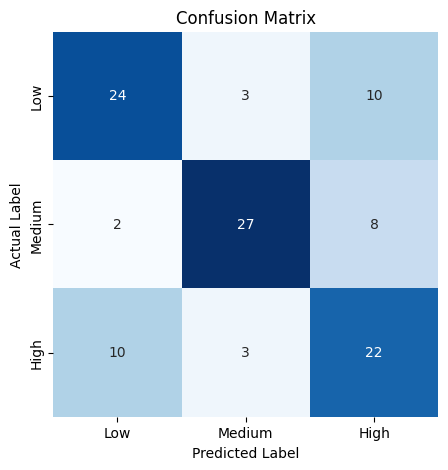

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))  # Adjust size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'], square=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()